Report Mohamed Benyahia

Question 1)a):

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy.stats import t

In [135]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [136]:
# Display data set



california_df = pd.DataFrame(california.data,
                             columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
n=california.data.shape[0]
p=california.data.shape[1]
Y=california.target # MedHouseValue
X_tilde=california.data
ones=np.ones((n,1))
X=np.concatenate((ones,X_tilde),axis=1)
teta_hat= (np.linalg.inv(np.transpose(X)@X)@np.transpose(X))@Y
print(teta_hat)

[-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01
 -4.34513755e-01]


In [138]:
def calculMSE(y,y_hat):
    n=len(y)
    return np.linalg.norm(y-y_hat)**2/n

def calculR2(y,y_hat):
    y_=np.mean(y)
    R2=1 - np.linalg.norm(y_hat - y)**2 / np.linalg.norm(y - y_)**2
    return R2



In [139]:
Y_hat= X@teta_hat
MSE=calculMSE(Y,Y_hat)
R2=calculR2(Y,Y_hat)
print("MSE = ",MSE)
print("R2 = ",R2)


MSE =  0.5243209861846072
R2 =  0.606232685199805


In [140]:
#Compare with sklearn version



linear_regression = LinearRegression()
linear_regression.fit(X=X, y=Y)

pred = linear_regression.predict(X)
expec = Y
MSE_sk=calculMSE(expec,pred)
R2_sk=calculR2(expec,pred)
print("sklearn MSE = ",MSE_sk)
print("sklearn R2 = ",R2_sk)

print('MSE relative error',np.abs(MSE-MSE_sk)/MSE_sk)
print('R2 relative error',np.abs(R2-R2_sk)/R2_sk)




sklearn MSE =  0.5243209861846072
sklearn R2 =  0.606232685199805
MSE relative error 0.0
R2 relative error 0.0


We can see that sklearn gives nearly the same MSE and the same R2.

Question 1)b):

In [141]:

alpha=0.01
CI=[]
sigma_hat=np.sqrt(np.linalg.norm(Y-Y_hat)**2/(n-p-1))
XtXinv=np.linalg.inv(np.transpose(X)@X)
for i in range(p+1):
    err_i=t.ppf(1-alpha/2,n-2)*sigma_hat*np.sqrt(XtXinv[i][i])
    CI_i=[teta_hat[i]-err_i,teta_hat[i]+err_i]
    CI.append(CI_i)
    print("Confidence interval for teta coefficient",i,CI_i)

Confidence interval for teta coefficient 0 [-38.639276502747286, -35.244563913026376]
Confidence interval for teta coefficient 1 [0.4258820454670263, 0.44750454079823493]
Confidence interval for teta coefficient 2 [0.008286132017840158, 0.010585424048395287]
Confidence interval for teta coefficient 3 [-0.12248317598605145, -0.09216090679258408]
Confidence interval for teta coefficient 4 [0.5725881795532235, 0.7175432074778152]
Confidence interval for teta coefficient 5 [-1.6210645359727923e-05, 8.257866516554987e-06]
Confidence interval for teta coefficient 6 [-0.005042156244246675, -0.0025309290656548977]
Confidence interval for teta coefficient 7 [-0.43985399110824613, -0.40277476396137263]
Confidence interval for teta coefficient 8 [-0.4539189884764268, -0.41510852088960587]


Question 2)a):

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data= pd.read_csv('data.csv',header=None)
(n,m)=data.shape
y= data.iloc[:,m-1]
X=data.iloc[:,0:m-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
scaler=StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
y_train_std = scaler.fit_transform(y_train)
y_test_std = scaler.transform(y_test)

Question 2)b):

In [143]:
lin_reg = LinearRegression()
lin_reg.fit(X=X_train_std, y=y_train_std)
pred = lin_reg.predict(X_test_std)
expec = y_test_std
R2_origin=calculR2(expec,pred)
MSE=calculMSE(expec,pred)


print('R2 Test=',R2_origin)
print('MSE =',MSE)

R2 Test= 0.11422288325771923
MSE = 0.7031873534714478


***Variable Selection***
Question 3)

a) The p-value has a very big significance because if we select the features with the smallest p-values it is equiavalent to taking the features with the largest test statistics for the test of no effect so it is equiavlent to taking the most important features.  

b) We substract the residuals to account for the predictive information the selection of a feature has brought in the modeling of Y so to avoid selecting two identical features.

In [144]:



def TestNoeffect(X,y,j):
    n,p=X.shape
    ones=np.ones((n,1))
    X_=np.concatenate((ones,X[:,j].reshape(n,1)),axis=1)
    
    lin_reg=LinearRegression(fit_intercept=True)
    lin_reg.fit(X_, y)
    teta_hat=lin_reg.coef_.T
   
    
    sigma_hat=np.sqrt(np.linalg.norm(y-X_@teta_hat)**2/(n-2))
    
    t_val=np.linalg.norm(teta_hat, 1)/(sigma_hat*np.sqrt(np.linalg.pinv(X_.T @ X_ )[0,0]))
    p_val = 2*(1 - t.cdf(t_val,n-2))

    
    return p_val,teta_hat

def forwardSelection(X,y,p_halt=0.05,doPlot=False):
    n,p=X.shape
    S=[]
    S_halt=[]
    final_p_values=[]
    
    i=0
    while len(S)<p:
        P_vals={}
        tetas_hat={}
        for j in range(p):
            if j not in S:
                p_val,teta_hat=TestNoeffect(X,y,j)
                P_vals[j]=p_val
                
                tetas_hat[j]=teta_hat
        
       

        f= min(P_vals, key=P_vals.get)
        S.append(f)
        final_p_values.append(P_vals[f])
        if P_vals[f]<p_halt:
            S_halt.append(f)
        y=y - np.concatenate((np.ones((n,1)), X[:, f].reshape(n,1)), axis=1) @ tetas_hat[f]
        if doPlot and i<=4 :
            
            plt.plot(np.array(list(P_vals.keys()))[0:10],np.array(list(P_vals.values()))[0:10],label='step '+str(i))
            i=i+1
        if i==5:
            plt.legend()
    
   
    return S,S_halt,final_p_values


    The variables by order of importance      p_values
0                                     34  0.000000e+00
1                                     58  0.000000e+00
2                                     79  6.863533e-09
3                                    123  2.212987e-06
4                                    135  2.611464e-03
5                                    167  4.382713e-04
6                                     30  4.190059e-03
7                                     77  1.191259e-02
8                                    168  6.972421e-03
9                                    174  1.394183e-02
10                                   129  2.749700e-02
11                                   183  4.437968e-02
12                                    13  4.520798e-02


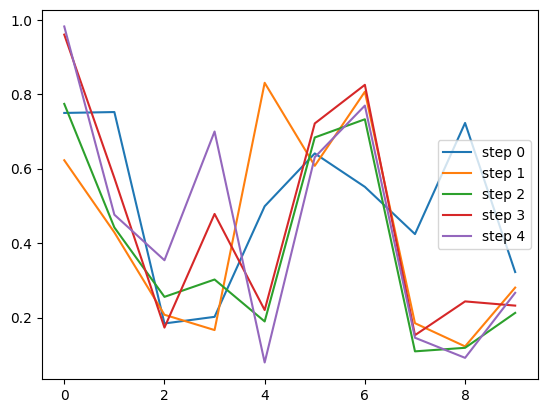

In [145]:
y_copy=y_train_std.copy()
S,S_halt,final_p_values= forwardSelection(X_train_std,y_copy,p_halt=0.05,doPlot=True)
df_ordered = pd.DataFrame(S_halt, columns=['The variables by order of importance'])
df_ordered['p_values'] = final_p_values[:len(S_halt)]
print(df_ordered)

#plt.plot(final_p_values[::-1])

Here i plotted just for the 10 first coefficients.

***Extensions***  

Question 4)

In [146]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,start,end,num,reg):
    n,p=X_train_std.shape
    
    log_start=np.log10(start)
    log_end=np.log10(end)
    penalty_paramters=np.logspace(log_start,log_end,num=num)
    D={}
    
    test_scores=[]
    for i in range(p+1):
        D[i]=[]

    if reg=="Ridge":
        model = lambda alpha : Ridge(alpha=alpha)
    elif reg=="Lasso":
        model = lambda alpha : Lasso(alpha=alpha)
    elif reg=="ElasticNet":
        model=lambda alpha : ElasticNet(alpha=alpha)
    else:
        return
    for alpha in penalty_paramters:
        clf = model(alpha=alpha)
        clf.fit(X_train_std,y_train_std)
        
        test_scores.append((clf.score(X_test_std,y_test_std)))
        teta0=clf.intercept_
        D[0].append(teta0)
        teta=clf.coef_.T
        
        
        for i in range(1,p+1):
            D[i].append(teta[i-1])
    return penalty_paramters,D,test_scores



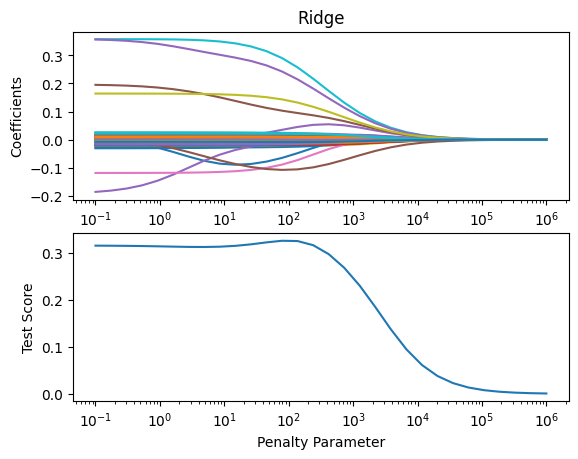

In [147]:

penalty_paramters,D,test_scores= computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,10**(-1),10**(6),30,"Ridge")
plt.subplot(2, 1, 1)
plt.title("Ridge")
plt.xlabel("Penalty Parameter")
plt.ylabel("Coefficients")
plt.xscale('log')
n,p=X_train_std.shape

for i in range(p+1):
    plt.plot(penalty_paramters,np.array(D[i]))
plt.subplot(2,1,2)

plt.xlabel("Penalty Parameter")
plt.ylabel("Test Score")
plt.xscale('log')
plt.plot(penalty_paramters,np.array(test_scores))

Question 5)

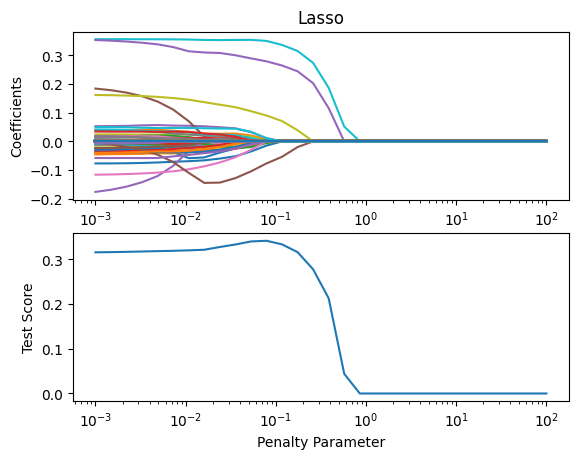

In [148]:
penalty_paramters,D,test_scores= computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,10**(-3),10**(2),30,"Lasso")
plt.subplot(2, 1, 1)
plt.title("Lasso")
plt.xlabel("Penalty Parameter")
plt.ylabel("Coefficients")
plt.xscale('log')
    
for i in range(p+1):
    plt.plot(penalty_paramters,np.array(D[i]))
plt.subplot(2,1,2)

plt.xlabel("Penalty Parameter")
plt.ylabel("Test Score")
plt.xscale('log')
plt.plot(penalty_paramters,np.array(test_scores))

Question 6)

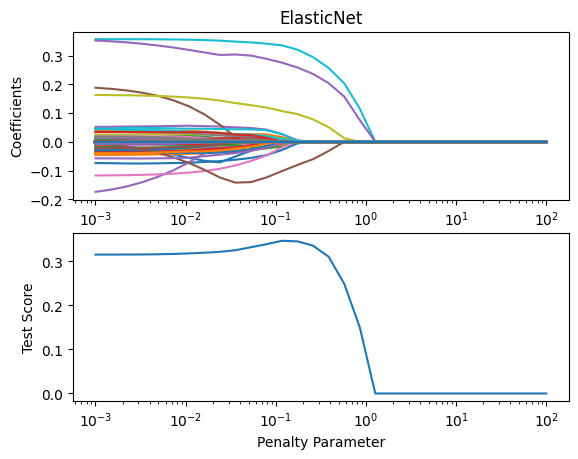

In [149]:
penalty_paramters,D,test_scores= computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,10**(-3),10**(2),30,"ElasticNet")
plt.subplot(2, 1, 1)
plt.title("ElasticNet")
plt.xlabel("Penalty Parameter")
plt.ylabel("Coefficients")
plt.xscale('log')
    
for i in range(p+1):
    plt.plot(penalty_paramters,np.array(D[i]))
plt.subplot(2,1,2)

plt.xlabel("Penalty Parameter")
plt.ylabel("Test Score")
plt.xscale('log')
plt.plot(penalty_paramters,np.array(test_scores))

***PCR***  
Question 7)a)


In [150]:
n,p=X_train_std.shape
covX=(1/(n-1))*np.transpose(X_train_std)@X_train_std
U, S, Vh = np.linalg.svd(covX, full_matrices=True)

<Axes: >

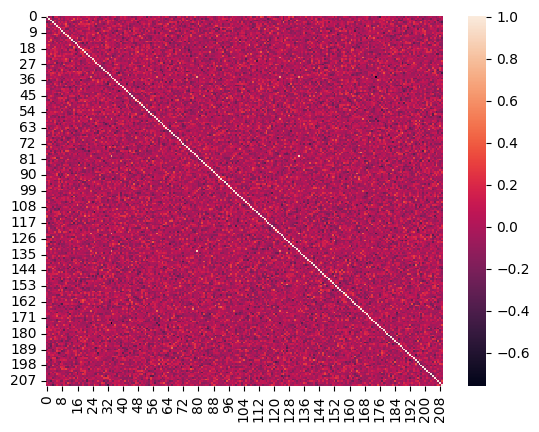

In [151]:
import seaborn as sns

sns.heatmap(covX)

Question 7)b)  


In [152]:
def calculPCA(X,k):
    n=X.shape[0]
    covX=(1/(n-1))*np.transpose(X)@X
    U, S, Vh = np.linalg.svd(covX, full_matrices=True)
    eigenVectors=np.transpose(Vh)
    eigenValues=(n-1)*S
    # sort from highest to lowest
    index_sort=np.argsort(eigenValues)[::-1]
    eigVal_sorted=sorted(eigenValues)[::-1]
    eigVect_sorted=eigenVectors[index_sort]
    explained_variance= eigVal_sorted/sum(eigVal_sorted)
    principalComponents=eigVect_sorted[:,:k]
    reduced_data = X@principalComponents
    
    return explained_variance,reduced_data,principalComponents


Question 7)c)

In [153]:
explained_variance,reduced_data,principalComponents=calculPCA(X_train_std,k=2)

we need to explain more than 90% of the variance  44 components


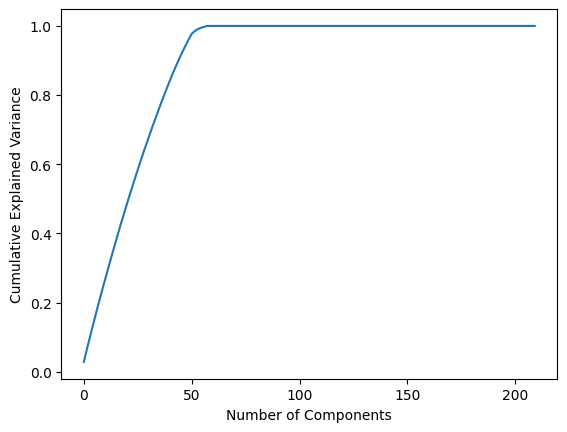

In [154]:
cumVariance=np.cumsum(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.plot(cumVariance)


print("we need to explain more than 90% of the variance ",np.where(cumVariance>=0.9)[0][0],"components")

Question 7)d)

Text(0.5, 1.0, 'Reduced Data for k=2')

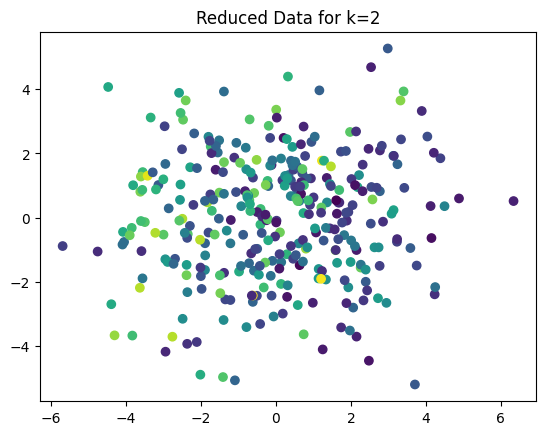

In [155]:
plt.scatter(reduced_data[:,0], reduced_data[:,1] ,c=y_train_std)
plt.title("Reduced Data for k=2")

We can see that there is a cluster.

Question 7)e)

Text(0, 0.5, 'PC 2')

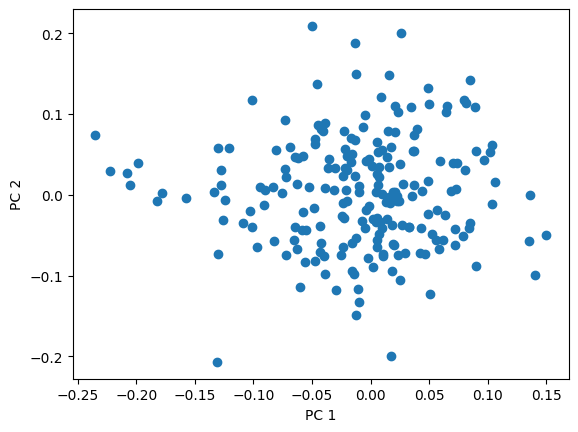

In [156]:
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")

Question 7)f)

In [157]:
from sklearn.decomposition import PCA
def computeScoresComponents(X_train_std,y_train_std,X_test_std,y_test_std):
    scores=[]
    
    for k in range(2,50):

        linReg=LinearRegression(fit_intercept=False)
        explained_variance,reduced_train,principalComponents=calculPCA(X_train_std,k=k)
        
        reduced_test=X_test_std@principalComponents
        scaler=StandardScaler()
        
        reduced_test= scaler.fit_transform(reduced_test)
        
        
       
        linReg.fit(X=reduced_train,y=y_train_std)
        predicted=linReg.predict(reduced_test)
        expected=y_test_std
        
        scores.append(calculR2(expected,predicted))
        
    return scores



The best k is 49


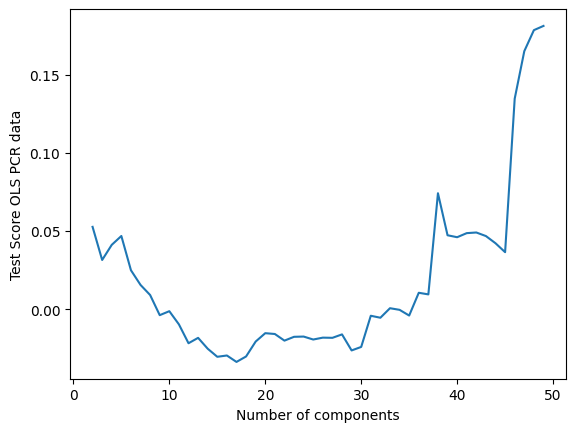

In [158]:
scores=computeScoresComponents(X_train_std,y_train_std,X_test_std,y_test_std)
plt.plot(np.array(list(range(2,50))),np.array(scores))
plt.xlabel("Number of components")
plt.ylabel("Test Score OLS PCR data")
print('The best k is', np.argmax(scores)+2)

8) Comparison of the models

In [159]:
print('Test Score Simple OLS  =',R2_origin)

Test Score Simple OLS  = 0.11422288325771923


***OLS after forward variable selection***

In [160]:
X_train_forVarSelect = []
X_test_forVarSelect = []
for k in range(len(S_halt)):
    X_train_forVarSelect.append(X_train_std[:, S_halt[k]])
    X_test_forVarSelect.append(X_test_std[:, S_halt[k]])

X_train_forVarSelect = np.array(X_train_forVarSelect).T
X_test_forVarSelect = np.array(X_test_forVarSelect).T
linReg_fvs=LinearRegression()
linReg_fvs.fit(X_train_forVarSelect,y_train_std)
score_fvs=linReg_fvs.score(X_test_forVarSelect,y_test_std)
print("Test Score OLS after forward variable selection =",score_fvs)


Test Score OLS after forward variable selection = 0.31321585946141883


***ElasticNet***

In [161]:
penalty_paramters,D,test_scores= computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,10**(-3),10**(2),30,"ElasticNet")



best_lambda=penalty_paramters[np.argmax(test_scores)]
R2_enet=np.max(test_scores)
print('Best Test Score ElasticNet = ',R2_enet)
print("The penalty parameter that maximizes the MSE test score is",best_lambda)

Best Test Score ElasticNet =  0.34656625920915063
The penalty parameter that maximizes the MSE test score is 0.11721022975334805


***Ridge***

In [162]:
penalty_paramters,D,test_scores= computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,10**(-1),10**(6),30,"Ridge")
best_lambda=penalty_paramters[np.argmax(test_scores)]
R2_ridge=np.max(test_scores)
print('Best Test Score Ridge = ',R2_ridge)
print("The penalty parameter that maximizes the MSE test score is",best_lambda)

Best Test Score Ridge =  0.3251845720225326
The penalty parameter that maximizes the MSE test score is 78.80462815669912


***Lasso***

In [163]:
penalty_paramters,D,test_scores= computeModelWithPenalties(X_train_std,y_train_std,X_test_std,y_test_std,10**(-3),10**(2),30,"Lasso")
best_lambda=penalty_paramters[np.argmax(test_scores)]
R2_lasso=np.max(test_scores)
print('Best Test Score Lasso = ',R2_lasso)
print("The penalty parameter that maximizes the MSE test score is",best_lambda)

Best Test Score Lasso =  0.3417500607314029
The penalty parameter that maximizes the MSE test score is 0.07880462815669913


***PCA***

In [164]:
scores=computeScoresComponents(X_train_std,y_train_std,X_test_std,y_test_std)
R2_PCA=np.max(scores)
print('Best Test Score OLS after PCA = ',R2_PCA)

Best Test Score OLS after PCA =  0.18128456487144684


***Conclusion***


Test R2(Simple OLS) < R2(OLS after PCA)< R2(OLS after Forward Variable Selection) < R2(Ridge)< R2(Lasso)< R2(ElasticNet)  
We conclude that ElasticNet is the best model for our dataset.